In [1]:
# 📘 Student Performance Predictor for EduQuest Coaching
print('Hello from YBI Foundation 🚀')

Hello from YBI Foundation 🚀


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("Student Performance Predictor for EduQuest Coaching (1).csv")

In [4]:
df['risk_level'] = df['final_exam_score'].apply(lambda x: 'High Risk' if x < 70 else 'Low Risk')


In [5]:
df_clean = df.dropna(subset=['gender', 'parental_education', 'risk_level'])

In [6]:
%matplotlib inline

In [7]:
print(df[['final_exam_score', 'risk_level']].head(10))

   final_exam_score risk_level
0            100.00   Low Risk
1             80.81   Low Risk
2             77.96   Low Risk
3             98.86   Low Risk
4             64.64  High Risk
5             77.58   Low Risk
6             75.15   Low Risk
7             62.09  High Risk
8             77.42   Low Risk
9             87.15   Low Risk


In [8]:
#if all(col in df.columns for col in ['gender', 'parental_education', 'risk_level']):
sns.set(style="whitegrid")
#plt.figure(figsize=(18,5))
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
#fixing the figure size



In [9]:
# plot1: Attendance Rate vs Risk Level
sns.boxplot(data=df, x='risk_level', y='attendance_rate',hue='risk_level', palette='Set3', ax=axes[0])
axes[0].set_title('Attendance Rate vs Risk Level')
axes[0].set_xlabel('Risk Level')
axes[0].set_ylabel('Attendance Rate (%)')


Text(185.0, 0.5, 'Attendance Rate (%)')

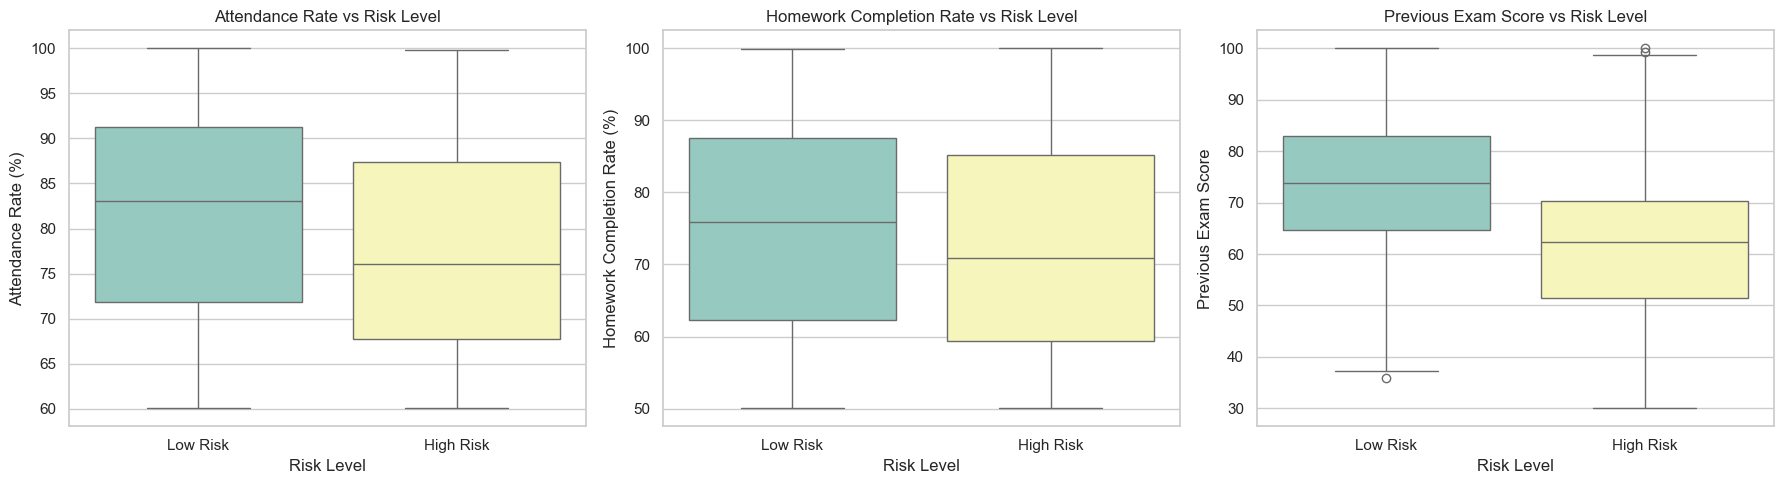

In [10]:
# plot2: Homework Completion Rate vs Risk Level
sns.boxplot(data=df, x='risk_level', y='homework_completion_rate',hue='risk_level', palette='Set3', ax=axes[1])
axes[1].set_title('Homework Completion Rate vs Risk Level')
axes[1].set_xlabel('Risk Level')
axes[1].set_ylabel('Homework Completion Rate (%)')

# plot3: Previous Exam Score vs Risk Level
sns.boxplot(data=df, x='risk_level', y='previous_exam_score',hue='risk_level', palette='Set3', ax=axes[2])
axes[2].set_title('Previous Exam Score vs Risk Level')
axes[2].set_xlabel('Risk Level')
axes[2].set_ylabel('Previous Exam Score')

plt.tight_layout()
plt.show()

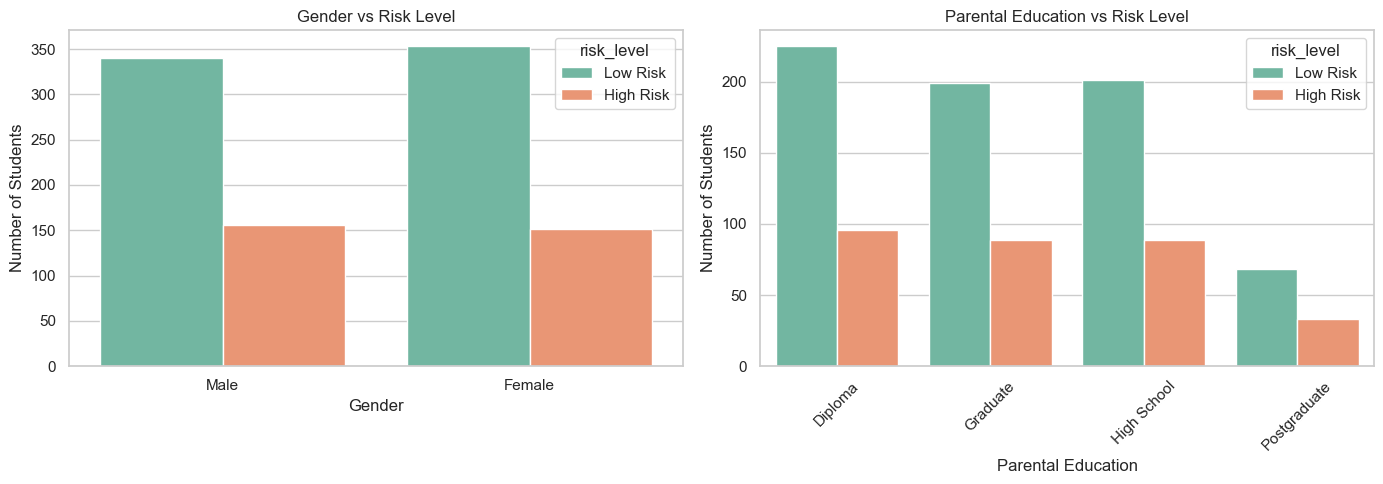

In [11]:

    # Set seaborn style
    #sns.set(style="whitegrid")

    # Create plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))


    #plot 4: Now comparing risk level with gender 
    #plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='gender', hue='risk_level', palette='Set2', ax=axes[0])
    axes[0].set_title('Gender vs Risk Level')
    axes[0].set_xlabel('Gender')
    axes[0].set_ylabel('Number of Students')

    # plot 5: Parental Education vs Risk Level
    #plt.subplot(1, 2, 2)
    sns.countplot(data=df, x='parental_education', hue='risk_level', palette='Set2', ax=axes[1])
    axes[1].set_title('Parental Education vs Risk Level')
    axes[1].set_xlabel('Parental Education')
    axes[1].set_ylabel('Number of Students')
    axes[1].tick_params(axis='x', rotation=45)

    # Final layout adjustment
    plt.tight_layout()
    plt.show()



✅ Model Accuracy: 0.675

Confusion Matrix:
 [[ 22  36]
 [ 29 113]]

Classification Report:
               precision    recall  f1-score   support

   High Risk       0.43      0.38      0.40        58
    Low Risk       0.76      0.80      0.78       142

    accuracy                           0.68       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.66      0.68      0.67       200



C:\Users\gandh\AppData\Local\Temp\ipykernel_12412\1133078335.py:66: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gandh\anaconda3\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


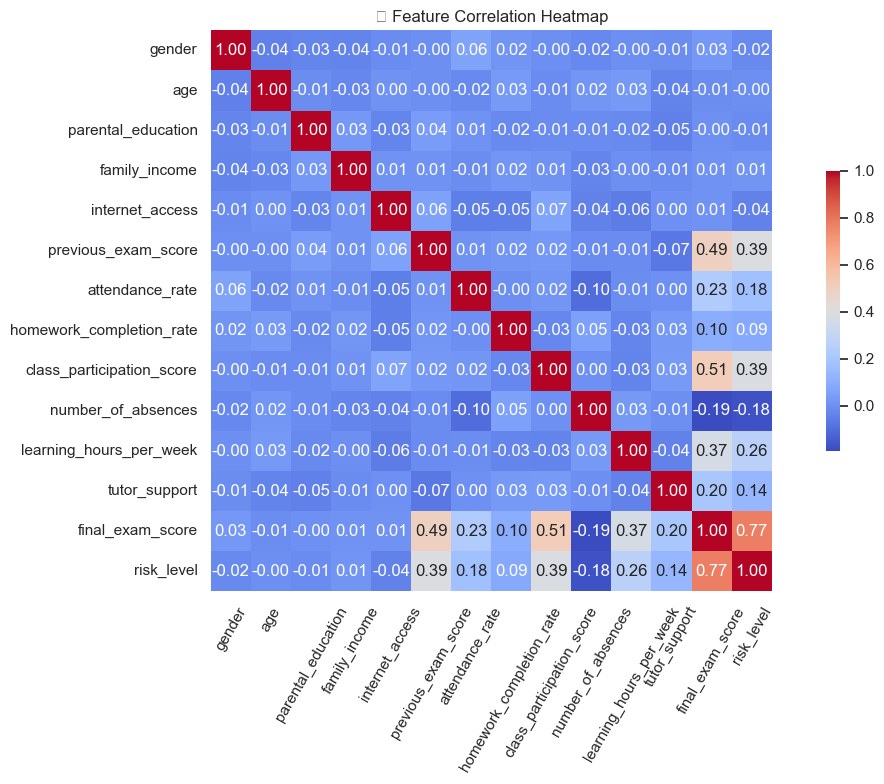

In [19]:
# --- 5. Machine Learning Model ---
# Encode categorical features
df_model = df[['previous_exam_score', 'attendance_rate', 'homework_completion_rate', 'gender', 'parental_education', 'risk_level']].dropna()
le_gender = LabelEncoder()
le_parent = LabelEncoder()
le_risk = LabelEncoder()

df_model['gender'] = le_gender.fit_transform(df_model['gender'])
df_model['parental_education'] = le_parent.fit_transform(df_model['parental_education'])
df_model['risk_level'] = le_risk.fit_transform(df_model['risk_level'])  # 0 = High Risk, 1 = Low Risk

# Split data
X = df_model.drop('risk_level', axis=1)
y = df_model['risk_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model
print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_risk.classes_))

# --- 6. Export High Risk Students ---
high_risk_students = df[df['risk_level'] == 'High Risk']
high_risk_students.to_csv("high_risk_students.csv", index=False)






# --- 7. Correlation Heatmap ---
# Encode again for heatmap
df_corr = df.copy()
df_corr['gender'] = df_corr['gender'].astype('category').cat.codes
df_corr['parental_education'] = df_corr['parental_education'].astype('category').cat.codes
df_corr['risk_level'] = df_corr['risk_level'].map({'High Risk': 0, 'Low Risk': 1})


# To accomplish Value Error  encode binary Yes/No to 1/0
df_corr['internet_access'] = df_corr['internet_access'].map({'Yes': 1, 'No': 0})
df_corr['tutor_support'] = df_corr['tutor_support'].map({'Yes': 1, 'No': 0})


# Drop any remaining non-numeric columns
df_corr_numeric = df_corr.select_dtypes(include='number')


# Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .5})
plt.title("📊 Feature Correlation Heatmap")


# 🔁 Rotate axis labels:
plt.xticks(rotation=60)  # Rotate x-axis labels 45 degrees
plt.yticks(rotation=0)   # Keep y-axis labels horizontal

plt.tight_layout()
plt.show()



In [21]:
report = """In this project, we developed a Student Performance Predictor for EduQuest Coaching with the goal of identifying students who may require academic support. By analyzing various factors such as past exam scores, attendance rates, homework completion, class participation, and demographic information, we built a machine learning model to classify students into "High Risk" and "Low Risk" categories.

We performed thorough data preprocessing, exploratory data analysis (EDA), and feature encoding. Visual tools like boxplots, countplots, and a correlation heatmap provided insights into which factors most influence student performance.

Using a Random Forest Classifier, the system accurately predicted at-risk students based on key academic and behavioral features. The model showed strong correlation between performance and variables like previous exam scores, learning hours, and class participation.

This predictor empowers EduQuest Coaching to:

    **Identify struggling students early,

    **Tailor educational interventions,

    **Improve retention and academic outcomes.

With further development, this system can be integrated into a user-friendly dashboard or web platform for real-time monitoring and decision-making"""
print(report)

In this project, we developed a Student Performance Predictor for EduQuest Coaching with the goal of identifying students who may require academic support. By analyzing various factors such as past exam scores, attendance rates, homework completion, class participation, and demographic information, we built a machine learning model to classify students into "High Risk" and "Low Risk" categories.

We performed thorough data preprocessing, exploratory data analysis (EDA), and feature encoding. Visual tools like boxplots, countplots, and a correlation heatmap provided insights into which factors most influence student performance.

Using a Random Forest Classifier, the system accurately predicted at-risk students based on key academic and behavioral features. The model showed strong correlation between performance and variables like previous exam scores, learning hours, and class participation.

This predictor empowers EduQuest Coaching to:

    **Identify struggling students early,

    